#### Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .
#### Оцените ошибку модели из п.1 .
#### Сделайте вывод о том, как изменилась ошибка модели по значениям h.

p - глубина истории, сколько измерений назад учитываем в моделях

h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])
df.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


C:\Users\Viktor\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


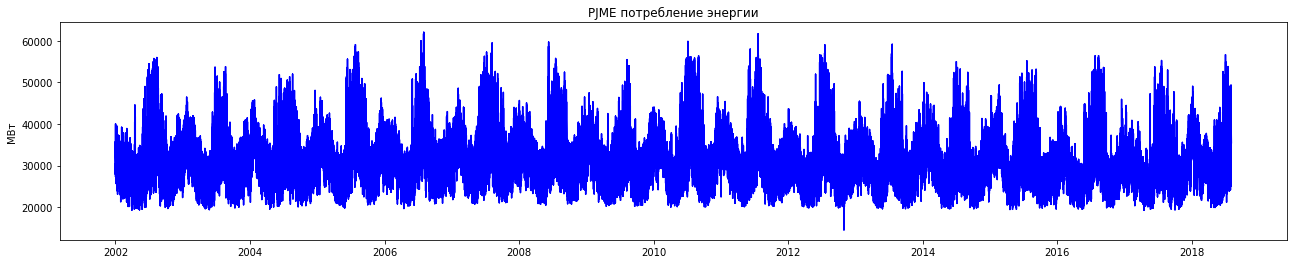

In [3]:
plt.figure( figsize=( 22, 4 ))
plt.plot( df.index, df['PJME_MW'], 'b' )
plt.title('PJME потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

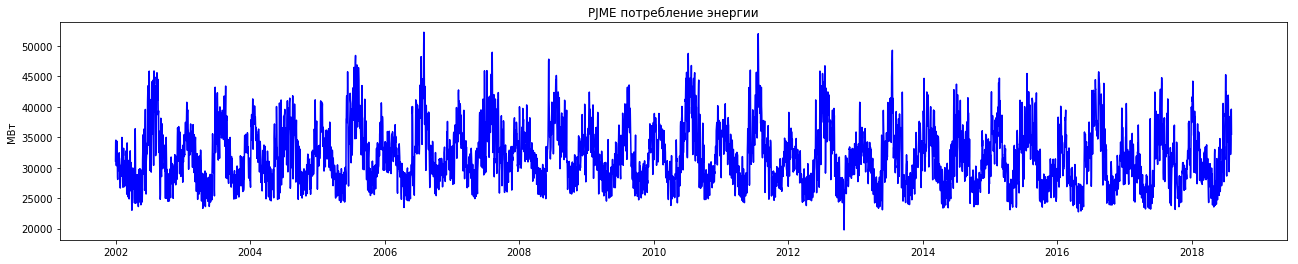

In [4]:
df_daily = df.resample('D').mean()
plt.figure( figsize=( 22, 4 ))
plt.plot( df_daily.index, df_daily['PJME_MW'], 'b' )
plt.title('PJME потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [5]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

Text(0.5,1,'PJME потребление энергии')

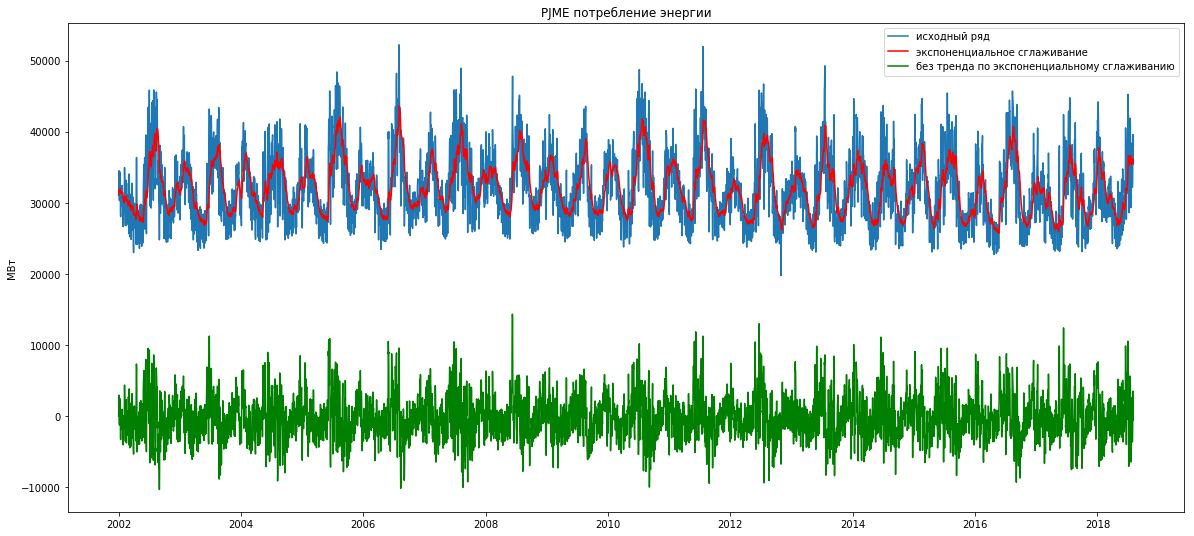

In [8]:
df_daily_exp = exponential_smoothing(df_daily['PJME_MW']  , 0.08)
plt.figure(figsize=(20, 9))
plt.plot(df_daily.index, df_daily['PJME_MW'], label='исходный ряд')

plt.plot(df_daily.index,df_daily_exp, color = 'red', label="экспоненциальное сглаживание");
plt.plot(df_daily.index,df_daily['PJME_MW'] - df_daily_exp, color = 'green', label="без тренда по экспоненциальному сглаживанию");
plt.ylabel('МВт')
plt.legend()
plt.title('PJME потребление энергии')

In [9]:
df_daily_exp = pd.DataFrame(data = df_daily_exp, index = df_daily.index)

In [10]:
df_daily_exp.head()

,0
Date,
2002-01-01,31080.739130
2002-01-02,31335.203333
2002-01-03,31589.337067
2002-01-04,31759.426768
2002-01-05,31651.082627


In [11]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

C:\Users\Viktor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [17]:
DF_ = sm.tsa.stattools.adfuller( df_daily['PJME_MW'] - df_daily_exp[0] , regression = 'ctt')
DF_

(-9.170365586683866,
 4.55391457624281e-13,
 33,
 6025,
 {'1%': -4.37305434095676,
  '5%': -3.8333705437821584,
  '10%': -3.5538675485903948},
 106669.89574381092)

In [19]:
df_daily_exp['t'] = 0
df_daily_exp.iloc[1:,1]=df_daily_exp.iloc[:-1,0].values
df_daily_exp['t1']=0
df_daily_exp.iloc[2:,2]=df_daily_exp.iloc[:-2,0].values
df_daily_exp['t2']=0
df_daily_exp.iloc[3:,3]=df_daily_exp.iloc[:-3,0].values
df_daily_exp.fillna(0)
df_daily_exp['exp_0_01'] = exponential_smoothing(df_daily_exp[0], 0.01)
df_daily_exp['exp_0_03'] = exponential_smoothing(df_daily_exp[0], 0.03)
df_daily_exp['exp_0_08'] = exponential_smoothing(df_daily_exp[0], 0.08)
df_daily_exp['diff1'] = 0
df_daily_exp['diff1'].iloc[1:] = df_daily_exp.iloc[:-1,0]-df_daily_exp.iloc[1:,0]
df_daily_exp.head()

C:\Users\Viktor\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000,31080.739130,31080.739130,31080.739130,0.0
2002-01-02,31335.203333,31080.739130,0.000000,0.000000,31083.283772,31088.373057,31101.096267,0.0
2002-01-03,31589.337067,31335.203333,31080.739130,0.000000,31088.344305,31103.401977,31140.155531,0.0
2002-01-04,31759.426768,31589.337067,31335.203333,31080.739130,31095.055130,31123.082721,31189.697230,0.0
2002-01-05,31651.082627,31759.426768,31589.337067,31335.203333,31100.615405,31138.922718,31226.608061,0.0


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

C:\Users\Viktor\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

In [38]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
train_b, test_b = split_data_b( df_daily_exp, '10-10-2016')

In [54]:
h = 1
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df_daily_exp.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df_daily_exp.columns[0]].values[h:]

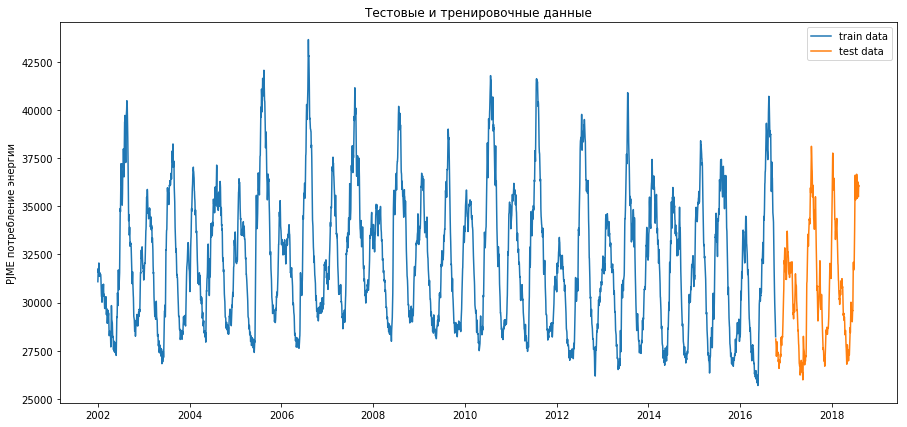

In [55]:
plt.figure( figsize=( 15, 7 ))
plt.ylabel('PJME потребление энергии')
plt.plot(train_b.index.get_level_values('Date'),train_b[df_daily_exp.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('Date'),test_b[df_daily_exp.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [56]:
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

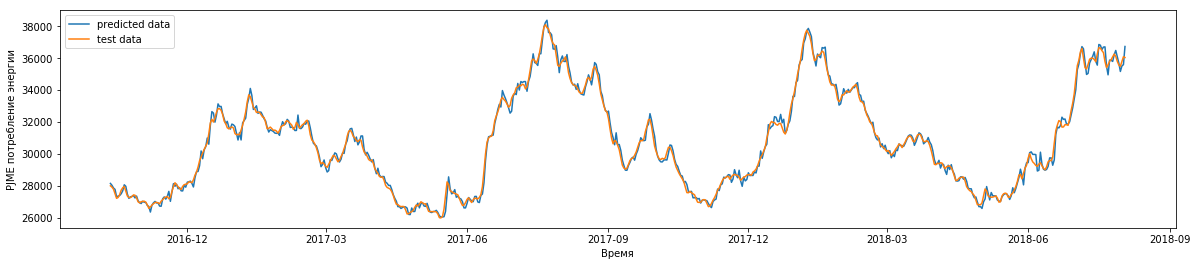

ошибка градиентного бустинга :   0.6531063169578433 %


In [57]:
plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('PJME потребление энергии')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predicted data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

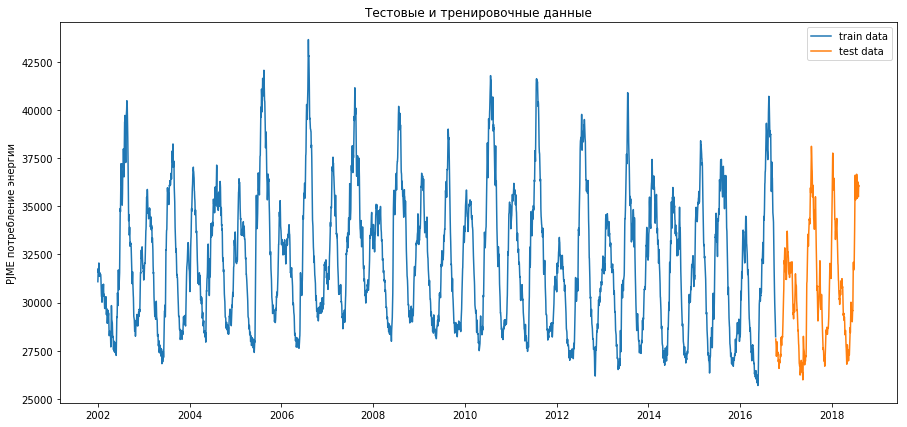

In [58]:
h = 10
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df_daily_exp.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df_daily_exp.columns[0]].values[h:]
plt.figure( figsize=( 15, 7 ))
plt.ylabel('PJME потребление энергии')
plt.plot(train_b.index.get_level_values('Date'),train_b[df_daily_exp.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('Date'),test_b[df_daily_exp.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

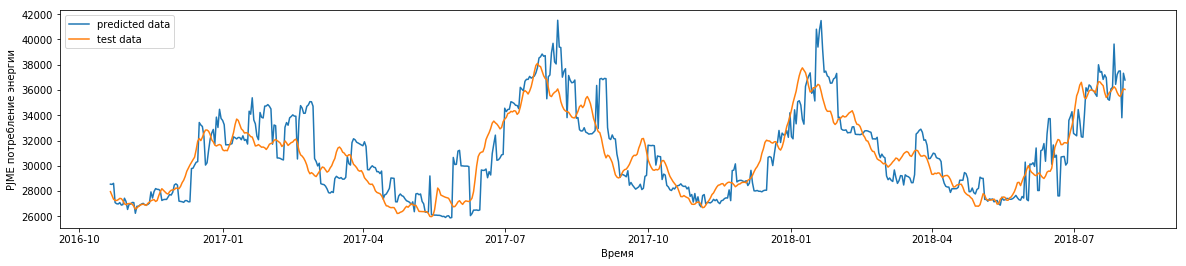

ошибка градиентного бустинга :   4.612970741750702 %


In [59]:
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)
plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('PJME потребление энергии')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predicted data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

Ошибка выросла с ростом глубины от ~0.7% при глубине h=1 до ~4.6% при глубине h=10.

###     Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :). - ряд с сезоном и циклом, зимой холоднее, летом теплее, слежующей зимой так же холодно, как и в предыдущую.

б) Количество денег, которые тратят покупатели в интернет магазине. - ряд с трендом и сезоном, перед праздниками тратят больше, а в среднем оборот обычно растёт (как минимум из-за инфляции).

в) Вес растущего котенка. - ряд с трендом, котёнок набирает вес на пути ко взрослой жизни, в домашних условиях это происходит более-менее равномерно.

г) Прирост объема деревьев в лесу от времени - ряд с трендом и сезоном, новые деревья появляются весной-летом, при этом с каждым годом деверьев всё больше и прирос тоже увеличивается.

Как я понимаю, если удалим из ряда его трендовую, сезонную и цикличную состовляющие, то останется стационарная часть ряда. Я думаю, из любого ряда можно выделить стационарну, близкую к 0, составляющую - шум.